### Assignment 3 Python
Topic : Balance Sheet analysing for Non-Banking/Financial sector sectors

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

***To Ignore Warnings***

In [41]:
import warnings
warnings.catch_warnings()
warnings.simplefilter("ignore")

In [42]:
data = pd.read_csv("./Dataset/balance_sheets/full_non_banking.csv").drop("Id",axis=1)

In [43]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'catagory', 'symbol', 'linkquate', 'bs_standalone_link',
       'equity share capital', 'total share capital', 'reserves and surplus',
       'total reserves and surplus', 'total shareholders funds',
       'long term borrowings', 'deferred tax liabilities [net]',
       'other long term liabilities', 'long term provisions',
       'total non-current liabilities', 'short term borrowings',
       'trade payables', 'other current liabilities', 'short term provisions',
       'total current liabilities', 'total capital and liabilities',
       'tangible assets', 'intangible assets', 'capital work-in-progress',
       'other assets', 'fixed assets', 'non-current investments',
       'deferred tax assets [net]', 'long term loans and advances',
       'other non-current assets', 'total non-current assets',
       'current investments', 'inventories', 'trade receivables',
       'cash and cash equivalents', 'short term loans and advances',
       'othercurrentassets', 'total cu

### Data Exploration

In [44]:
## statical information
data.describe()

,equity share capital,total share capital,reserves and surplus,total reserves and surplus,total shareholders funds,long term borrowings,deferred tax liabilities [net],other long term liabilities,long term provisions,total non-current liabilities,...,capital goods,expenditure in foreign currency,dividend remittance in foreign currency,fob value of goods,other earnings,bonus equity share capital,non-current investments quoted market value,non-current investments unquoted book value,current investments quoted market value,current investments unquoted book value
count,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,...,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1.368000e+03,1368.000000
mean,158.079839,161.643713,2493.946981,2498.526572,2664.322032,1514.826696,119.304766,358.471089,218.665782,2211.268216,...,4.803114,1010.977807,0.339474,171.031411,625.268136,47.574883,186.378808,632.340797,2.603509e+03,201.623977
std,970.381401,974.250421,14520.433694,14519.679349,14813.873810,12885.826751,1609.412888,3535.135601,3513.618053,15528.318769,...,57.216391,11148.765711,6.812689,2232.299583,8668.927627,365.190787,1927.300115,10736.336583,9.220732e+04,1513.763951
min,1.000000,1.000000,-34329.000000,-34329.000000,-32946.000000,0.000000,-6.040000,0.000000,0.000000,-0.020000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,12.982500,13.107500,75.427500,79.350000,106.337500,0.000000,0.000000,0.070000,0.217500,13.070000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,25.000000,25.345000,371.425000,375.025000,419.935000,11.725000,0.000000,4.855000,2.475000,69.350000,...,0.000000,3.145000,0.000000,0.000000,0.000000,0.975000,0.000000,1.500000,0.000000e+00,0.000000
75%,71.087500,72.665000,1312.200000,1315.485000,1416.417500,138.422500,12.395000,37.122500,12.252500,303.225000,...,0.000000,76.707500,0.000000,0.000000,26.222500,10.887500,0.000000,82.577500,0.000000e+00,0.000000
max,28735.400000,28735.400000,418244.000000,418244.000000,424583.000000,286340.480000,50556.000000,80374.580000,88036.750000,286522.600000,...,1335.180000,267121.920000,224.000000,77974.000000,284196.000000,9037.980000,42534.940000,391801.000000,3.410200e+06,38216.000000


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 53 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   name                                         1452 non-null   object 
 1   catagory                                     1452 non-null   object 
 2   symbol                                       1452 non-null   object 
 3   linkquate                                    1452 non-null   object 
 4   bs_standalone_link                           1452 non-null   object 
 5   equity share capital                         1368 non-null   float64
 6   total share capital                          1368 non-null   float64
 7   reserves and surplus                         1368 non-null   float64
 8   total reserves and surplus                   1368 non-null   float64
 9   total shareholders funds                     1368 non-null   float64
 10  

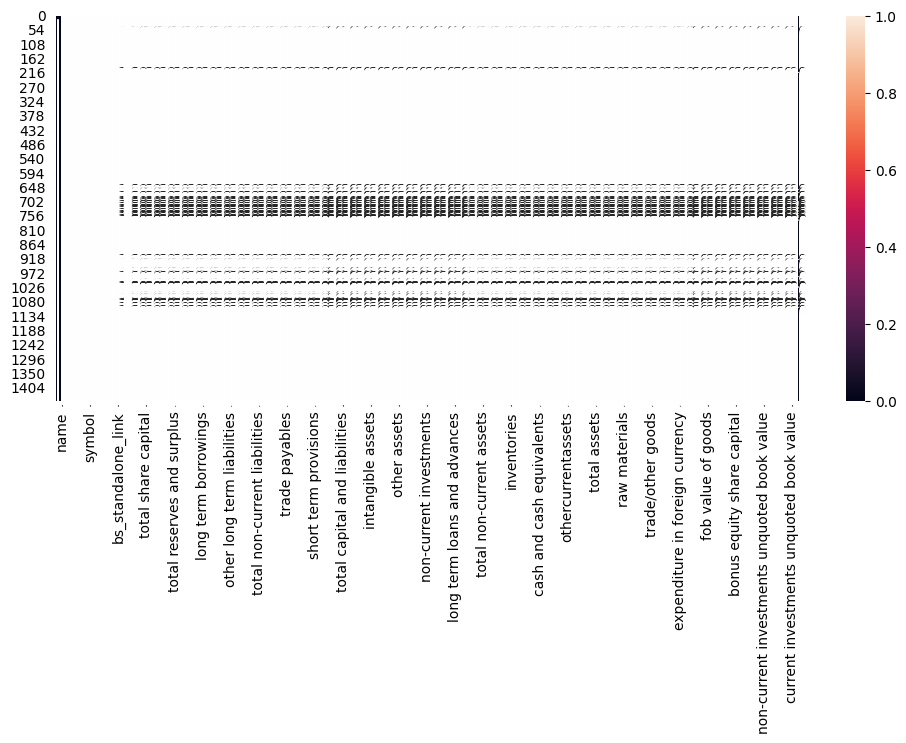

In [46]:
## Check null values
plt.figure(figsize=(12,5))
sb.heatmap(data.isnull(),annot=True,fmt=".2f")
plt.show()

In [47]:
data.isnull().mean()*100

name                                           0.000000
catagory                                       0.000000
symbol                                         0.000000
linkquate                                      0.000000
bs_standalone_link                             0.000000
equity share capital                           5.785124
total share capital                            5.785124
reserves and surplus                           5.785124
total reserves and surplus                     5.785124
total shareholders funds                       5.785124
long term borrowings                           5.785124
deferred tax liabilities [net]                 5.785124
other long term liabilities                    5.785124
long term provisions                           5.785124
total non-current liabilities                  5.785124
short term borrowings                          5.785124
trade payables                                 5.785124
other current liabilities                      5

In [48]:
data.shape

(1452, 53)

In [49]:
data.dropna().shape

(1368, 53)

#### Categories or sectors of economy

In [50]:
catagories = data['catagory'].unique()
catagories

array(['abrasives', 'aluminium', 'aquaculture', 'auto23wheelers',
       'autocarsjeeps', 'autotractors', 'autoancillaries', 'bearings',
       'breweriesdistilleries', 'cablestelephone', 'castingsforgings',
       'cementmajor', 'cementmini', 'chemicals', 'cigarettes',
       'compressors', 'computershardware', 'computerssoftware',
       'computerssoftwaretraining', 'constructioncontractingcivil',
       'constructioncontractinghousing',
       'constructioncontractingrealestate', 'consumergoodselectronic',
       'consumergoodswhitegoods', 'couriers', 'diversified',
       'domesticappliances', 'drycells', 'dyespigments',
       'edibleoilssolventextraction', 'electricequipment', 'electricals',
       'engineering', 'engineeringheavy', 'engines', 'textilesdenim',
       'textilesgeneral', 'textilesmachinery', 'textilesmanmade',
       'textilesprocessing', 'textilesreadymadeapparels',
       'textilesspinningcottonblended',
       'textilesspinningsyntheticblended', 'textilesweaving

### Data selection:
1. Remove unnecessary columns.

In [51]:
from sklearn.compose import make_column_selector

num_col_selector = make_column_selector(dtype_include='float64')
num_cols = num_col_selector(data)
cat_cols = ['catagory']
len(num_cols)

48

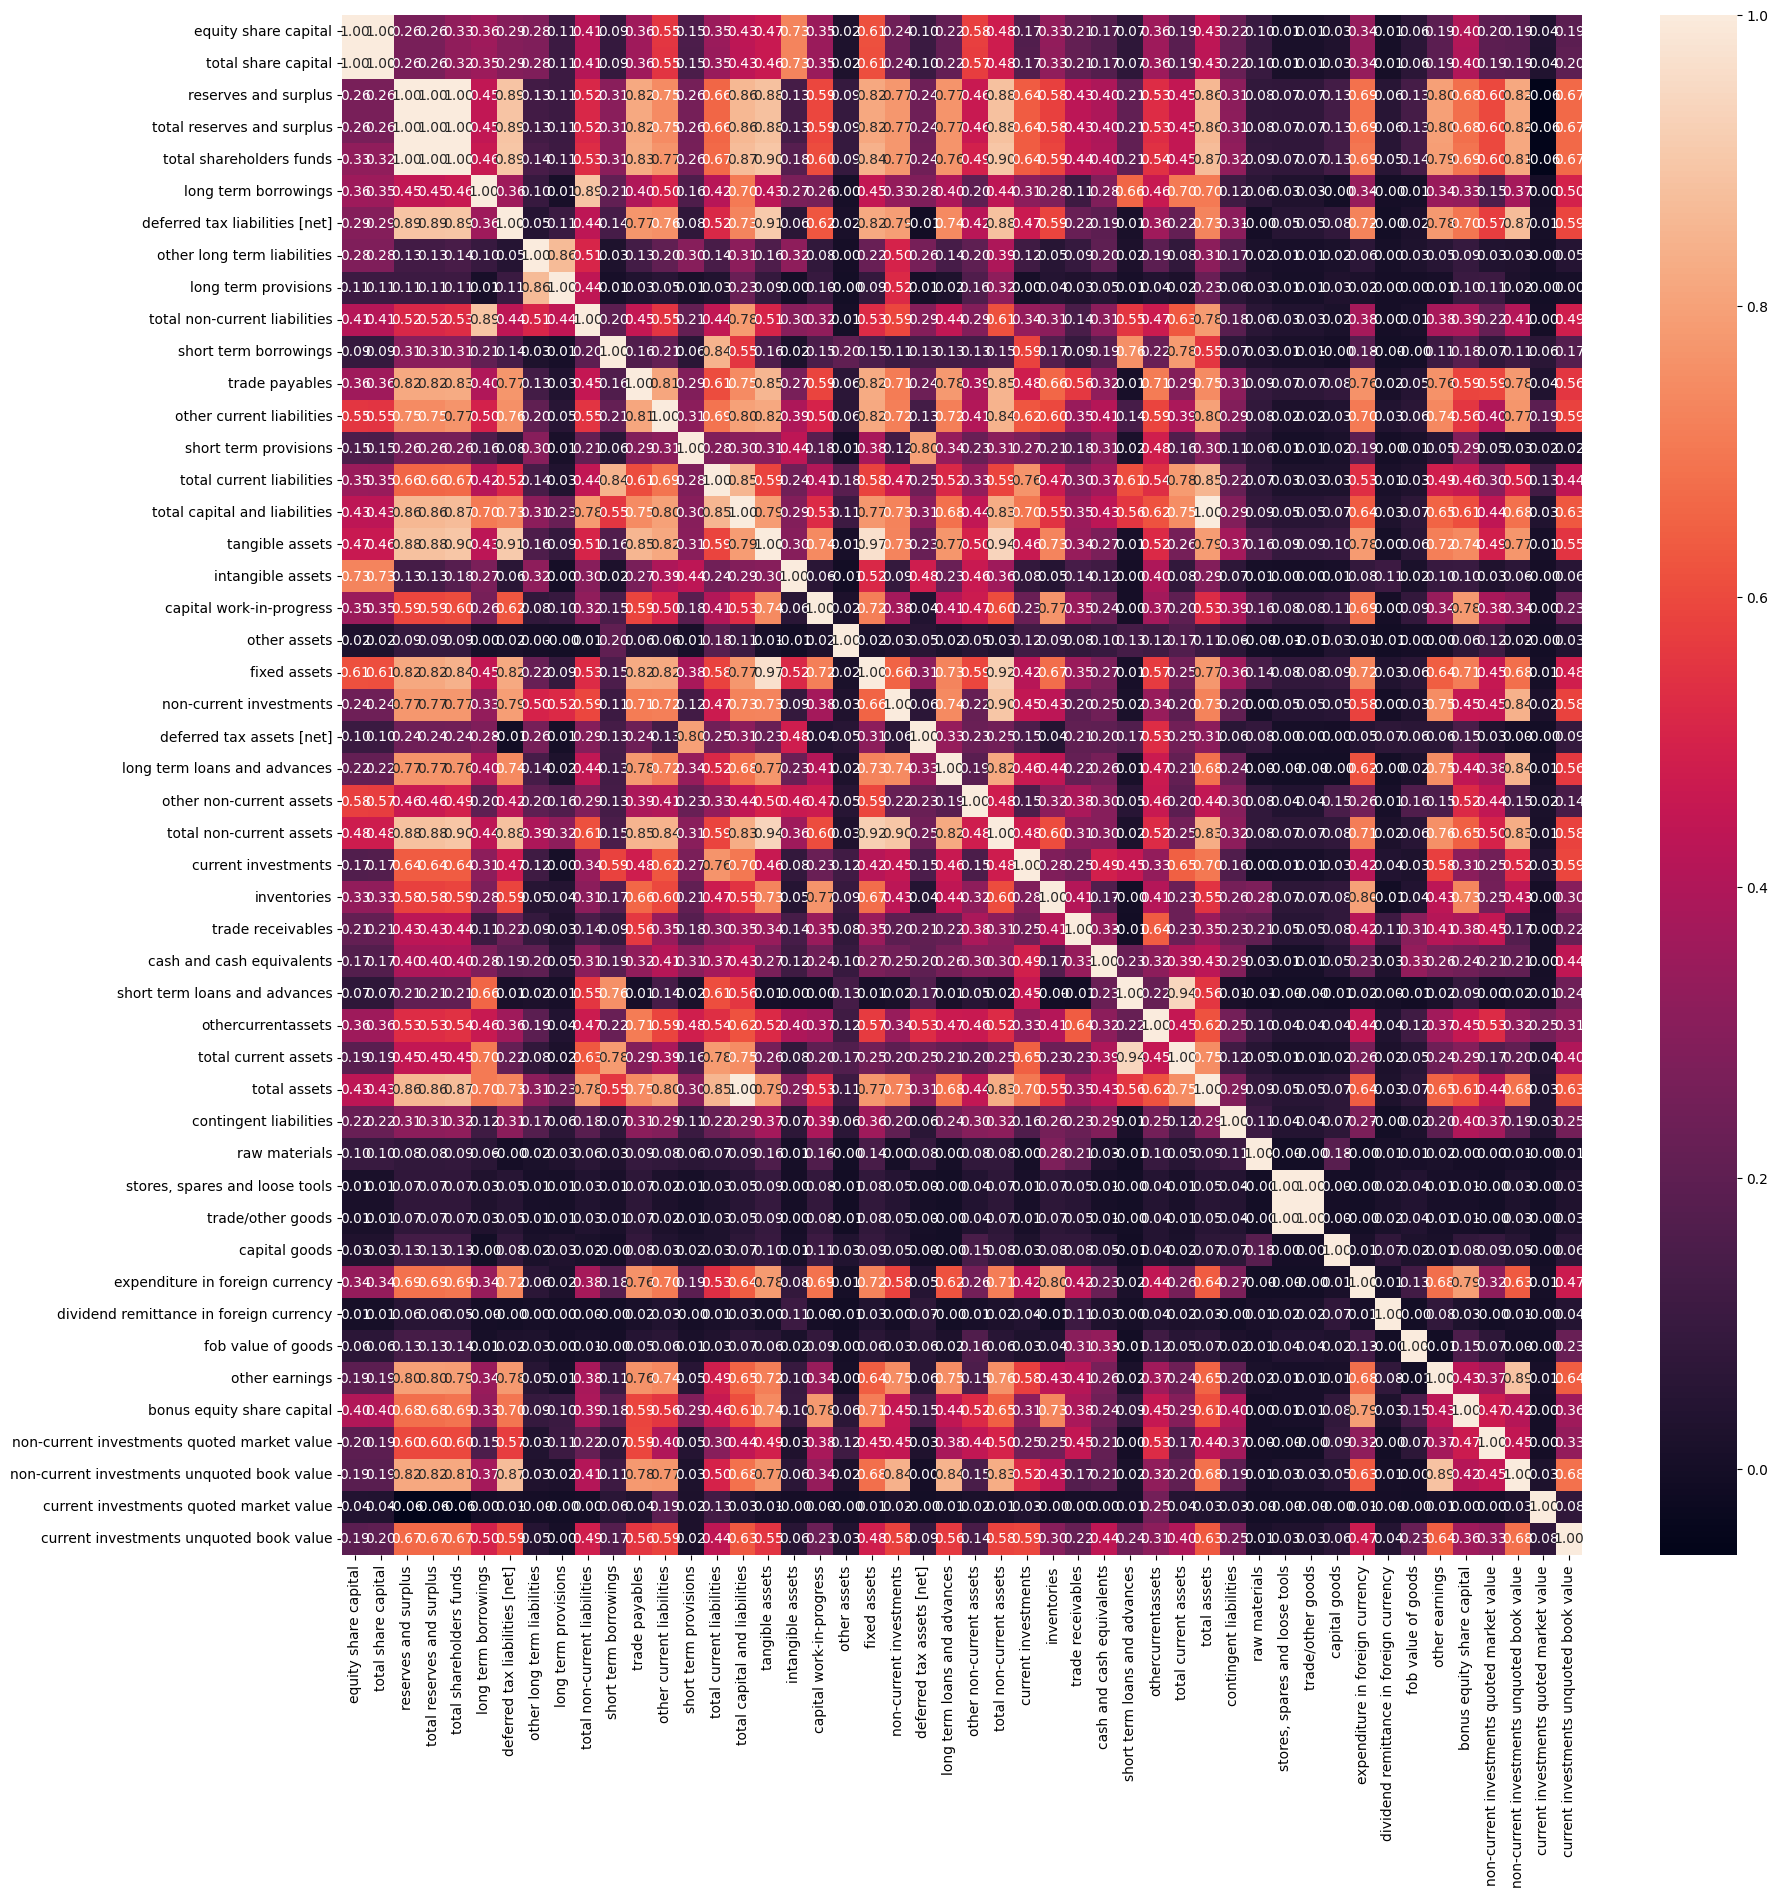

In [52]:
corr = data[num_cols].corr()
plt.figure(figsize=(20,20))
sb.heatmap(corr,annot=True,fmt=".2f")
plt.show()


To filter out the columns that are highly correlated in the given correlation matrix, you can set a correlation threshold and exclude the columns that have correlation values above this threshold. By doing so, you'll keep only the columns that have correlations below the threshold, indicating a weaker correlation.

In [53]:
def get_uncorrelated_columns(data_frame, threshold=0.8):
    if not isinstance(data_frame, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame.")
    
    # Calculate the correlation matrix
    corr_matrix = data_frame.corr()
    
    # Find highly positively correlated columns
    highly_pos_corr_columns = corr_matrix.columns[corr_matrix.iloc[0] > threshold]
    
    # Find highly negatively correlated columns
    highly_neg_corr_columns = corr_matrix.columns[corr_matrix.iloc[0] < -threshold]
    
    # Combine both lists to get the final list of columns to exclude
    columns_to_exclude = set(highly_pos_corr_columns).union(set(highly_neg_corr_columns))
    
    # Get the columns that are not highly correlated
    uncorrelated_columns = [col for col in data_frame.columns if col not in columns_to_exclude]
    
    return uncorrelated_columns


unreated_cols = get_uncorrelated_columns(data[num_cols],0.8)

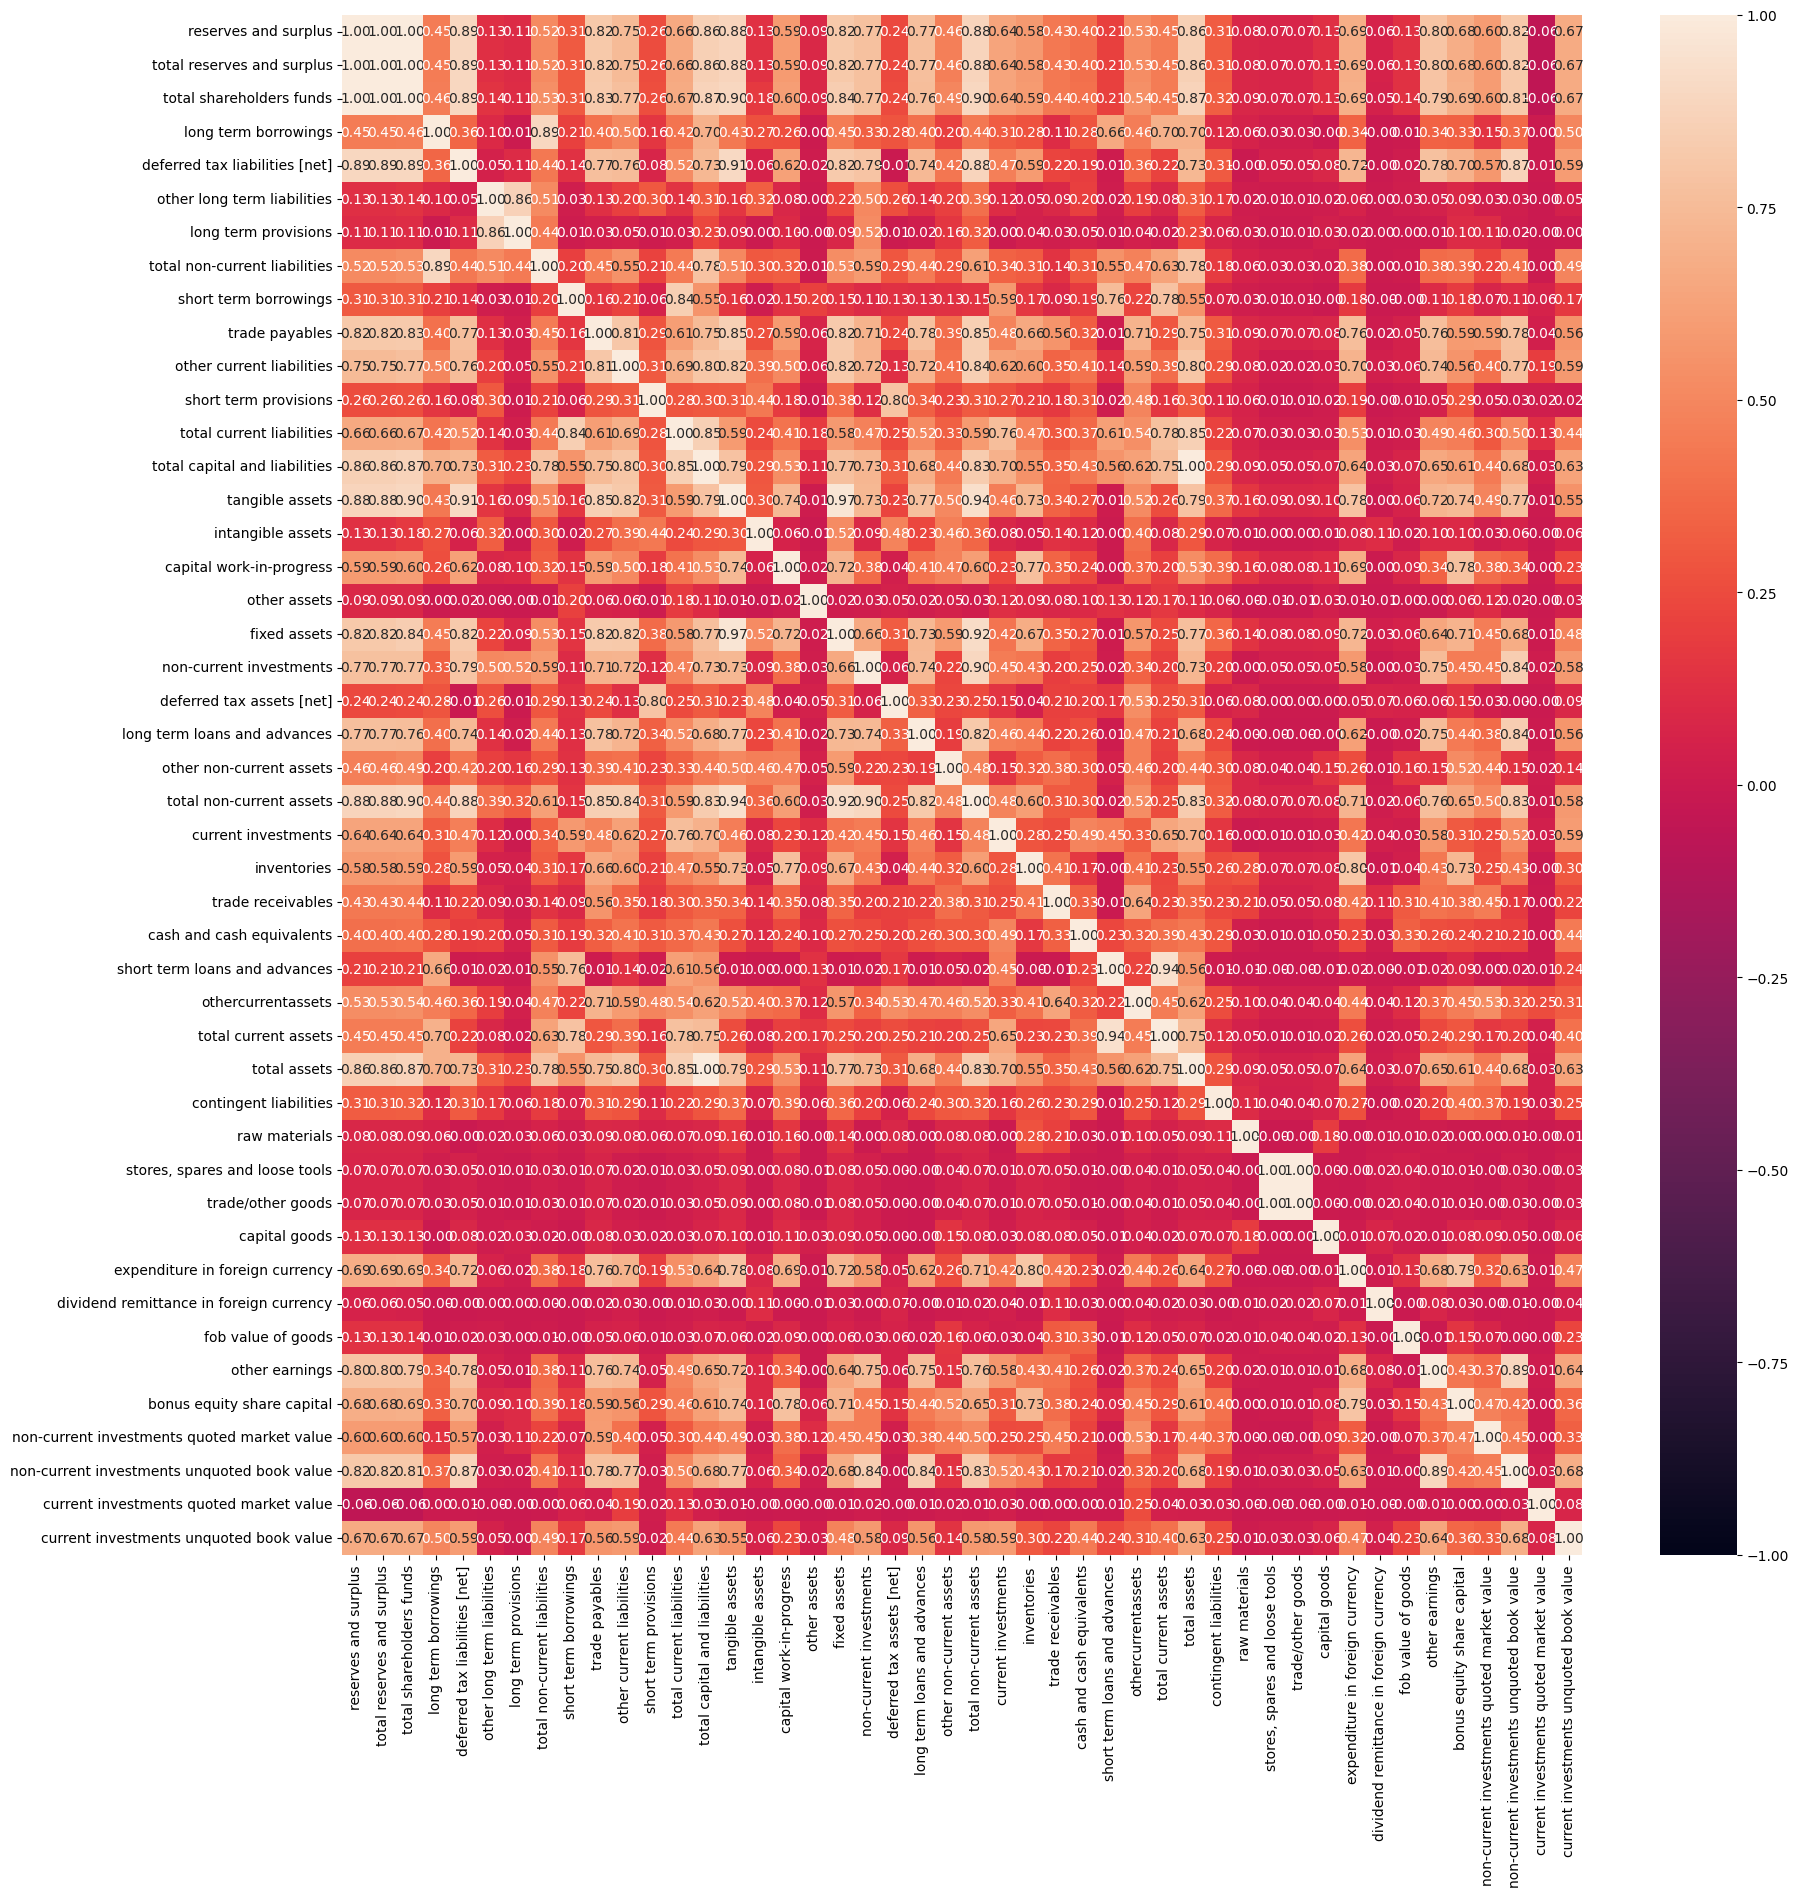

In [54]:

plt.figure(figsize=(20,20))
sb.heatmap(data[unreated_cols].corr(),annot=True,fmt=".2f",vmin=-1,vmax=1)
plt.show()

In [55]:
cols = unreated_cols+cat_cols

In [56]:
X = data[cols]
X.rename(columns={'catagory':'category'},inplace=True)
X.shape

(1452, 47)

### Preprocessing data

In [57]:
## Missing values

X.dropna(inplace=True,axis=0)
X.shape

(1368, 47)

In [58]:
## Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['category'] = label_encoder.fit_transform(X['category'])

In [59]:
## Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
process_data = scaler.fit_transform(X)

### Transform into different dimentials

In [60]:
from sklearn.manifold import TSNE
tnse = TSNE(n_components=2,n_jobs=-1)
bs_2d_tr = tnse.fit_transform(process_data)

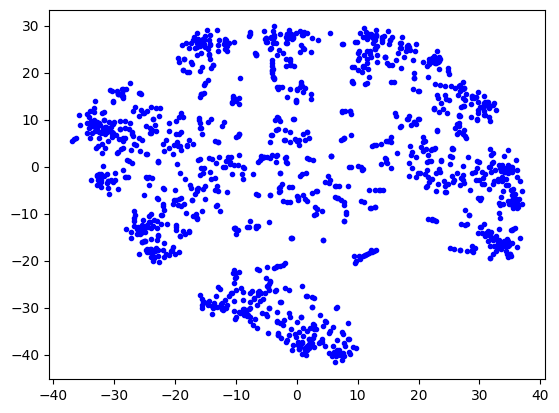

In [61]:
plt.plot(bs_2d_tr[:,0],bs_2d_tr[:,1],"b.")

### Apply Kmean clusting 

In [62]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(bs_2d_tr)

KMeans(n_clusters=6)

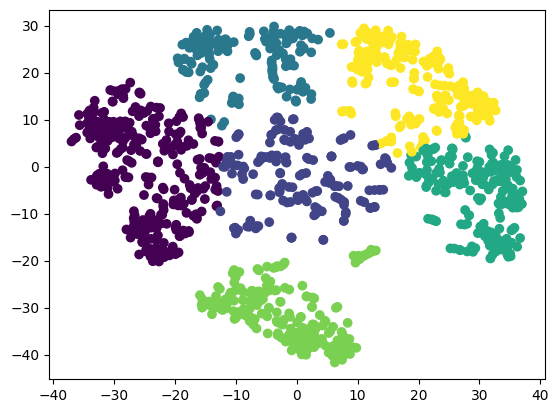

In [63]:
plt.scatter(bs_2d_tr[:,0],bs_2d_tr[:,1],c=kmeans.labels_)

### Apply DB Scan algorithm

In [64]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(n_jobs=-1)
clusters = dbscan.fit_predict(process_data)

In [65]:
np.unique(clusters,return_counts=True)

(array([-1,  0], dtype=int64), array([370, 998], dtype=int64))

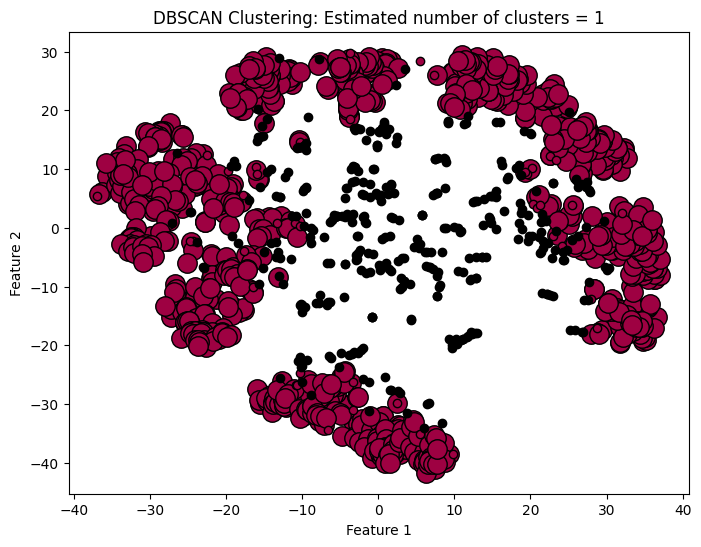

In [66]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot the DBSCAN result
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = bs_2d_tr[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    xy = bs_2d_tr[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title(f"DBSCAN Clustering: Estimated number of clusters = {n_clusters_}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [67]:
def plot_dbscan(dbscan,X = X,size=400):
    core_mask = np.zeros_like(dbscan.labels_,dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anormal_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anormal_mask)
    plt.scatter(X[anormal_mask,0],X[anormal_mask,1],marker="x",color='r',s=50,label="anormal")
    plt.scatter(X[core_mask,0],X[core_mask,1],c=dbscan.labels_[core_mask])
    plt.scatter(X[core_mask,0],X[core_mask,1],c=dbscan.labels_[core_mask],s=size,cmap=plt.cm.Paired,zorder=-1,alpha=.4)
    plt.scatter(X[non_core_mask,0],X[non_core_mask,1],marker=".",c=dbscan.labels_[non_core_mask])
    plt.legend()
    plt.title("eps={:.2f} min_sample={}".format(dbscan.eps,dbscan.min_samples))

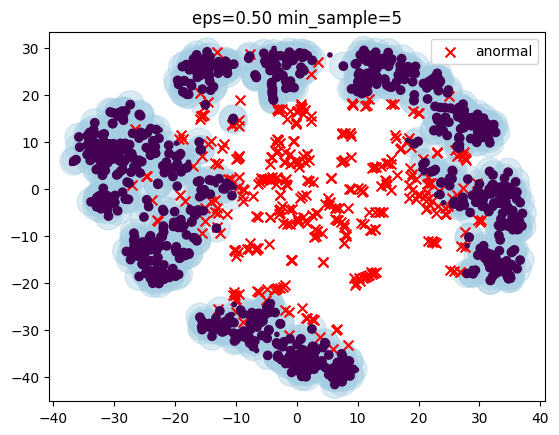

In [68]:
plot_dbscan(dbscan,bs_2d_tr)

### 

In [69]:
from sklearn.cluster import MiniBatchKMeans
import time
ks = range(1,50)
r_inertias = []
m_inertias = []

r_times = []
m_times = []

for k in ks:
    miniKmean = MiniBatchKMeans(n_clusters=k)
    regular_kmean = KMeans(n_clusters=k)
    t1 = time.time()
    regular_kmean.fit(bs_2d_tr)
    t2 = time.time()
    r_times.append(t2-t1)
    r_inertias.append(regular_kmean.inertia_)
    t1 = time.time()
    miniKmean.fit(bs_2d_tr)
    t2 = time.time()
    m_times.append(t2-t1)
    m_inertias.append(miniKmean.inertia_)
    

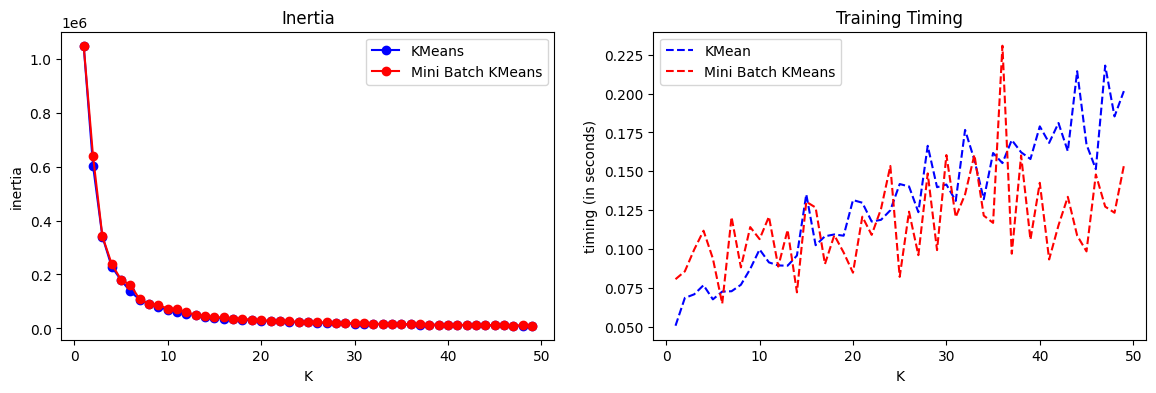

In [70]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(ks,r_inertias,'bo-',label="KMeans")
plt.plot(ks,m_inertias,'ro-',label="Mini Batch KMeans")
plt.title("Inertia")
plt.xlabel("K")
plt.ylabel("inertia")
plt.legend()
plt.subplot(122)
plt.plot(ks,r_times,"b--",label="KMean")
plt.plot(ks,m_times,"r--",label="Mini Batch KMeans")
plt.title("Training Timing")
plt.xlabel("K")
plt.ylabel("timing (in seconds)")
plt.legend()

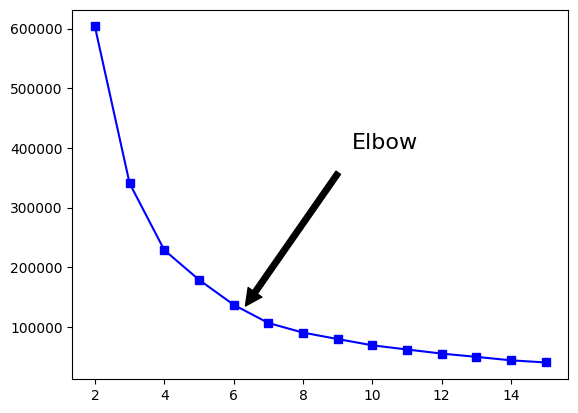

In [71]:
plt.plot(ks[1:15],r_inertias[1:15],"bs-")
plt.annotate("Elbow",xy=[6,r_inertias[6]],xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.show()

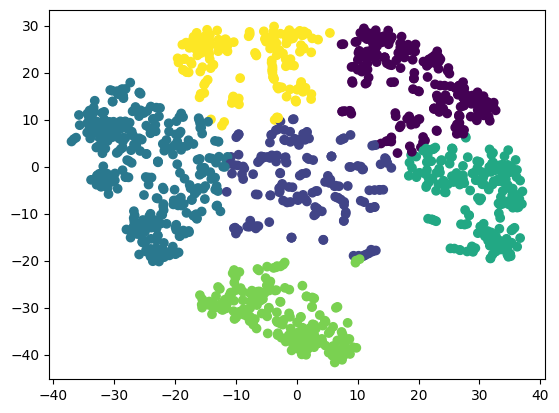

In [72]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(bs_2d_tr)
plt.scatter(bs_2d_tr[:,0],bs_2d_tr[:,1],c=kmeans.labels_)


In [73]:
from sklearn.metrics import silhouette_score
ks = range(2,10)
silhouetes = []
for k in ks:
    km = KMeans(n_clusters=k)
    km.fit(bs_2d_tr)
    silhouetes.append(silhouette_score(bs_2d_tr,km.labels_))

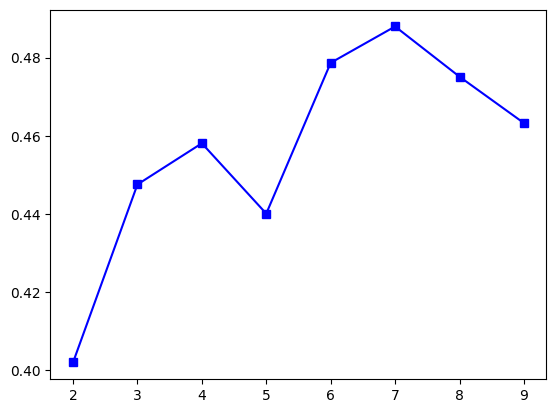

In [74]:
plt.plot(ks,silhouetes,"bs-")

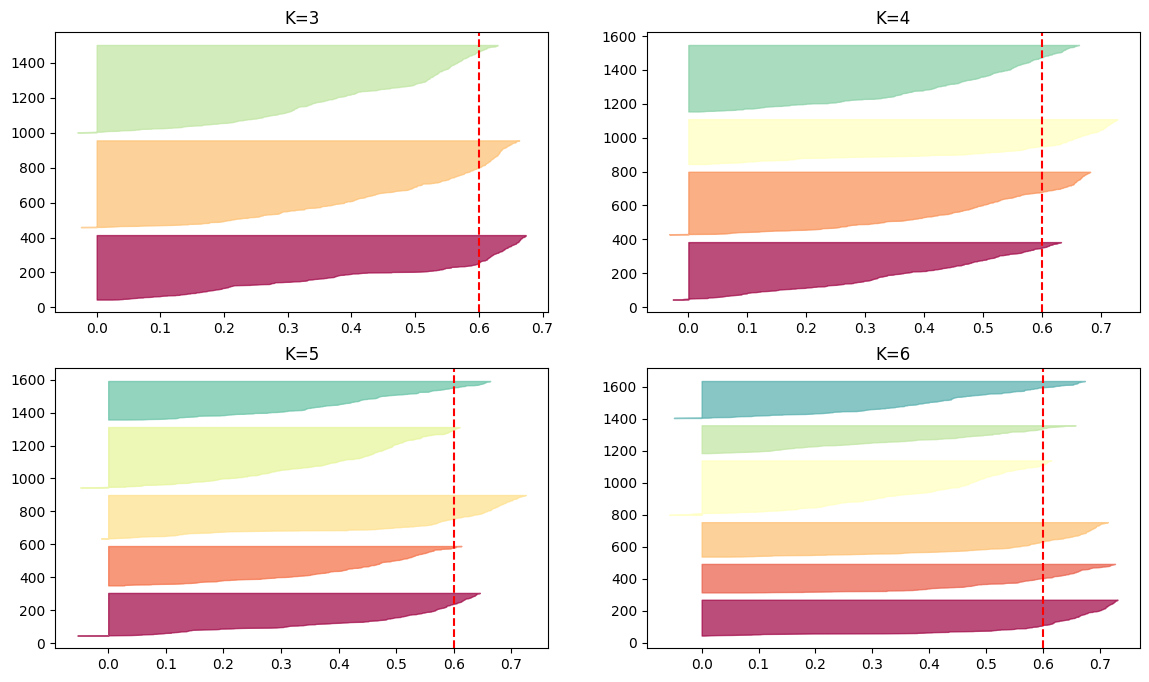

In [75]:
from sklearn.metrics import silhouette_samples
plt.figure(figsize=(14,8))
for k in (3,4,5,6):
    plt.subplot(2,2,k-2)
    k3 = KMeans(n_clusters=k)
    ypred = k3.fit_predict(bs_2d_tr)
    padding = len(bs_2d_tr)//30
    pos = padding
    silhouete_coef = silhouette_samples(bs_2d_tr,ypred)
    for i in range(k):
        coef = silhouete_coef[ypred==i]
        coef.sort()
        color = plt.cm.Spectral(i/k)
        plt.fill_betweenx(np.arange(pos,pos+len(coef)),0,coef,facecolor=color,edgecolor=color,alpha=.7)
        pos += len(coef) +padding
    plt.axvline(x=0.6,linestyle="--",color="red")
    plt.title("K="+str(k))